<a href="https://colab.research.google.com/github/Kevin00404/TA047R-2C2024-GRUPO09/blob/main/TA047R_TP1_GRUPOXX_ENTREGA_EJ4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 4

Ejercicio 4 del tp1 de materia Ciencia de Datos. 2c 2024

##Análisis exploratorio del DF

In [ ]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
spotify = pd.read_csv("playlist_spotify.csv")

In [ ]:
spotify.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288


In [ ]:
spotify.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000


Información de las columnas:
* acousticness: rango de [0, 1] - no hay outliers
* danceability: rango de [0, 1] - no hay outliers
* duration: info viene en milisegundos - creamos nueva columna que mapea a minutos. 1 min 30 segundos sería 1,5 en float -> no hay outliers
* energy: rango de [0, 1] - no hay outliers
* instrumentalness: rango de [0, 1] - no hay outliers
* key: es categórica, acorde de la canción. Range: [-1, 11 : 1] -> no hay outliers. 0 es un acorde aceptable (do) y en nuestro caso no hay una canción que no detecte el acorde, es decir valor -1.
* liveness: rango de [0, 1] - no hay outliers
* loudness: rango [-60,0] (en decibeles) -> no hay outliers
* mode: sólo hay 2 opciones, mayor representado por 1 y menos representado por 0 - no hay outliers
* speechiness: rango de [0, 1] - no hay outliers. It's more likely que se pueda agrupar en 3 grupos: < 0.33 canción, entre 0.33 y 0.66 contiene speech y canción (por ejemplo: raps), >0.66 track hablado (podcast).
* tempo: no hay rango predeterminado. Is the speed/pace of a given piece and derives directly from the average beat duration - beats per minute (BPM).
* time_signature: beats for each bar. Rango: [3, 7] indicating time signatures of "3/4", to "7/4" -> no hay outliers
* valence: rango de [0,1] donde 0 es triste :( y 1 es más alegre :) -> no hay outliers



Tabla de mapeo de acordes:
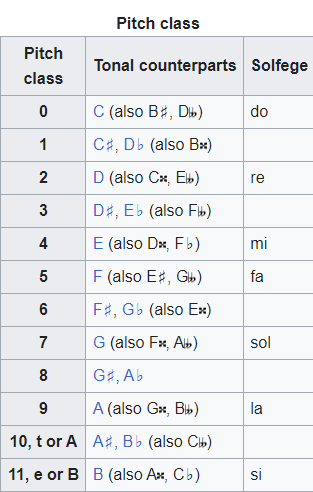

In [ ]:
# Convertir milisegundos a minutos y segundos
spotify['duration_min'] = spotify['duration'] / 60000.0

spotify['duration_min'] = spotify['duration_min'].astype(float)

In [ ]:
spotify

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,0.713000,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1.668750
1,0.192000,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,3.450317
2,0.333000,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,3.603333
3,0.601000,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,2.273550
4,0.883000,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,3.024000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,5.563783
746,0.001970,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,3.550000
747,0.916000,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,2.097783
748,0.168000,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,4.158217


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  duration_min      750 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 82.2 KB


In [ ]:
spotify = spotify.drop('duration', axis=1)

In [ ]:
spotify_copy = spotify.copy()

In [ ]:
#Calculo la correlación
matriz_corr=spotify.corr(numeric_only=True)
matriz_corr

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
acousticness,1.000000,-0.417974,-0.781691,0.331659,-0.065184,-0.140326,-0.695163,0.111980,-0.215614,-0.149472,-0.205854,-0.233485,0.054988
danceability,-0.417974,1.000000,0.360971,-0.238865,0.055302,-0.115735,0.396021,-0.058461,0.272283,0.064002,0.222486,0.483361,-0.231120
energy,-0.781691,0.360971,1.000000,-0.267846,0.066970,0.235887,0.830081,-0.102567,0.173371,0.197741,0.241667,0.364495,-0.093435
instrumentalness,0.331659,-0.238865,-0.267846,1.000000,-0.020726,-0.050720,-0.429529,-0.032180,-0.145104,-0.081531,-0.024597,-0.228774,0.161803
key,-0.065184,0.055302,0.066970,-0.020726,1.000000,-0.055710,0.009126,-0.158468,0.081137,-0.084476,0.096863,0.068146,-0.002089
liveness,-0.140326,-0.115735,0.235887,-0.050720,-0.055710,1.000000,0.154176,-0.023585,0.106747,-0.008093,0.037201,0.051110,-0.002576
loudness,-0.695163,0.396021,0.830081,-0.429529,0.009126,0.154176,1.000000,-0.048111,0.188873,0.188127,0.169130,0.294852,-0.179952
mode,0.111980,-0.058461,-0.102567,-0.032180,-0.158468,-0.023585,-0.048111,1.000000,-0.118390,0.013911,-0.044799,0.051939,-0.011989
speechiness,-0.215614,0.272283,0.173371,-0.145104,0.081137,0.106747,0.188873,-0.118390,1.000000,0.139993,0.088062,0.101257,-0.110645
tempo,-0.149472,0.064002,0.197741,-0.081531,-0.084476,-0.008093,0.188127,0.013911,0.139993,1.000000,0.027999,0.076123,-0.052321


<Axes: >

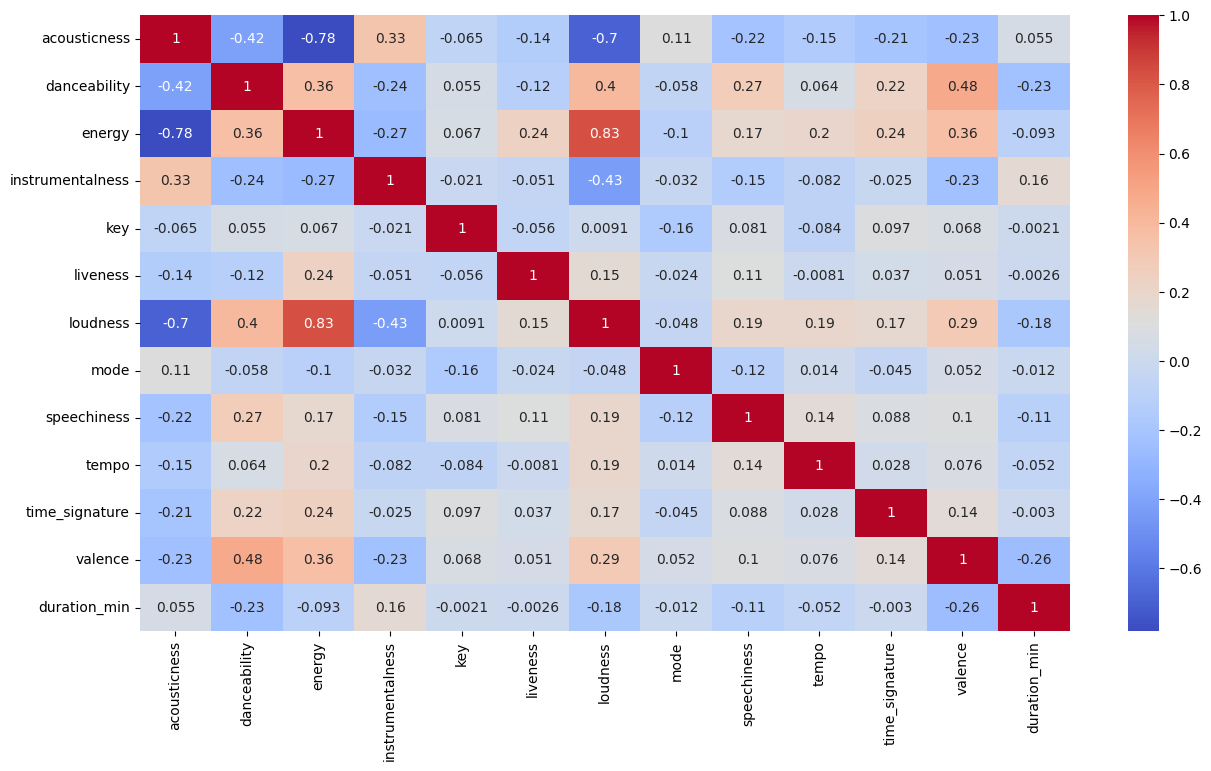

In [ ]:
#Grafico la matriz de correlación en un Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Correlaciones fuertes:
- Energy vs Acousticness (inversa)
- Loudness vs Acousticness (inversa)
- Loudness vs Energy (directa)
- Valence vs Danceabillity (directa)

###Conclusion de exploración
Los datos están totalmente limpios. Generamos la nueva variable de minutos en base a la de milisegundos.

##a. Analizar la tendencia al clustering del dataset.

In [ ]:
df=spotify.copy()

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   energy            750 non-null    float64
 3   instrumentalness  750 non-null    float64
 4   key               750 non-null    int64  
 5   liveness          750 non-null    float64
 6   loudness          750 non-null    float64
 7   mode              750 non-null    int64  
 8   speechiness       750 non-null    float64
 9   tempo             750 non-null    float64
 10  time_signature    750 non-null    int64  
 11  valence           750 non-null    float64
 12  duration_min      750 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 76.3 KB


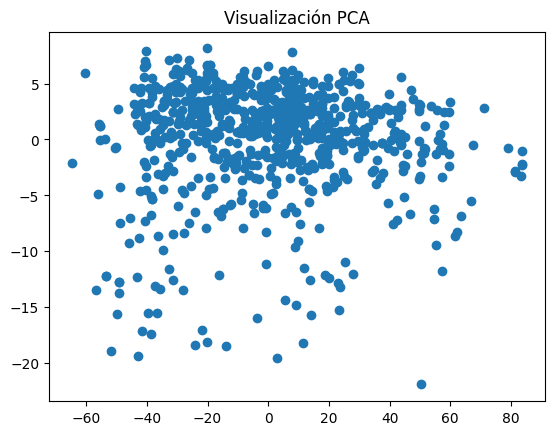

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('Visualización PCA')
plt.show()

##b. Estimar la cantidad apropiada de grupos que se deben formar

¿Cómo elegir el tamaño del Cluster?

método de Elbow: Visualmente es muy simple de ver dónde deja de ser muy relevante la suma de clusters, cuando deja de aportar información.

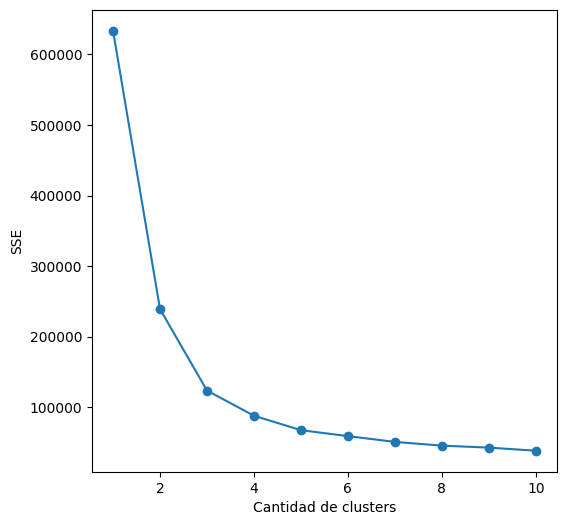

In [ ]:
from sklearn.cluster import KMeans
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

##c. Evaluar la calidad de los grupos formados realizando un análisis de Silhouette.


In [ ]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 8))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)

    score = silhouette_score (df, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.5104545203148873
For n_clusters =3 silhouette score is 0.506183389670642
For n_clusters =4 silhouette score is 0.4197133137693357
For n_clusters =5 silhouette score is 0.3993039647408795
For n_clusters =6 silhouette score is 0.3529729423509343
For n_clusters =7 silhouette score is 0.30213745141084297


De la separación de 3 a 4 hay una mayor diferencia. Elejimos el agrupamiento de 3.

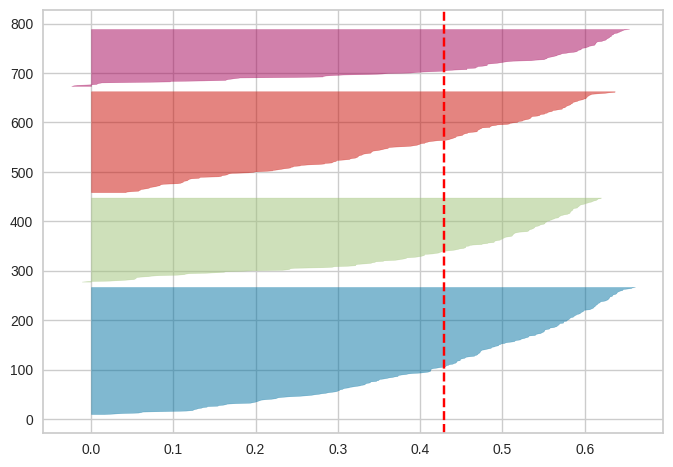

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df)
plt.show()

Se puede ver que el cluster azul es el que más valores tiene.

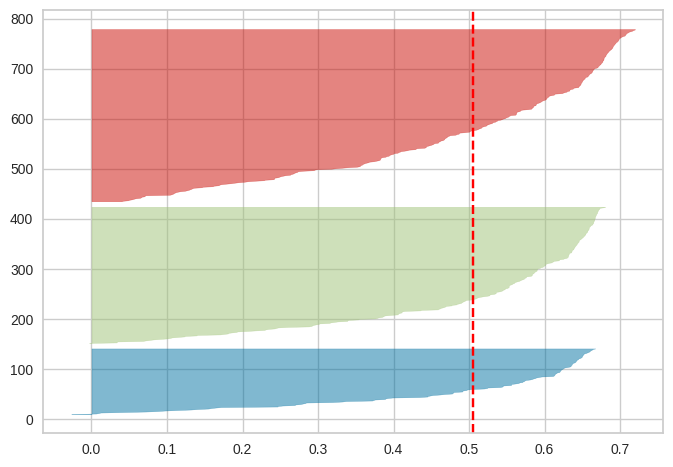

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df)
plt.show()

Con la separación en 3 grupos, hay dos que son más pronunciados que el 3ero.

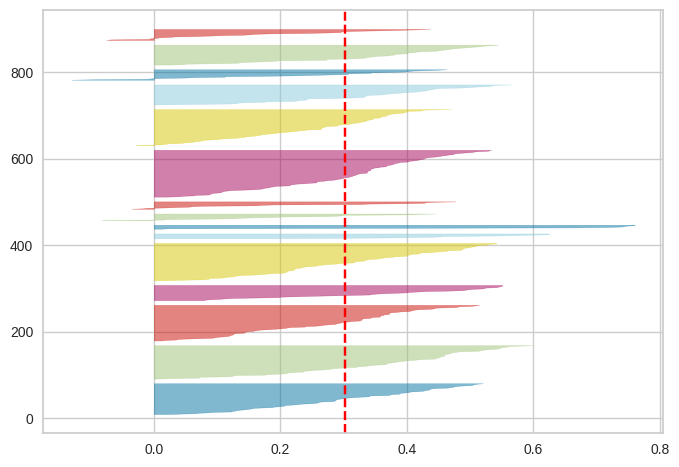

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(15, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)

silhouette_avg = silhouette_score(df, labels=clusters)
print(f'Coeficiente de Silhouette: {silhouette_avg}')


Coeficiente de Silhouette: 0.28639141908444554


Con un k demasiado grande baja notablemente el Silhouette . Lo probe con 300 y aun no llegaba a negativos. Por lo que separa bastante bien.

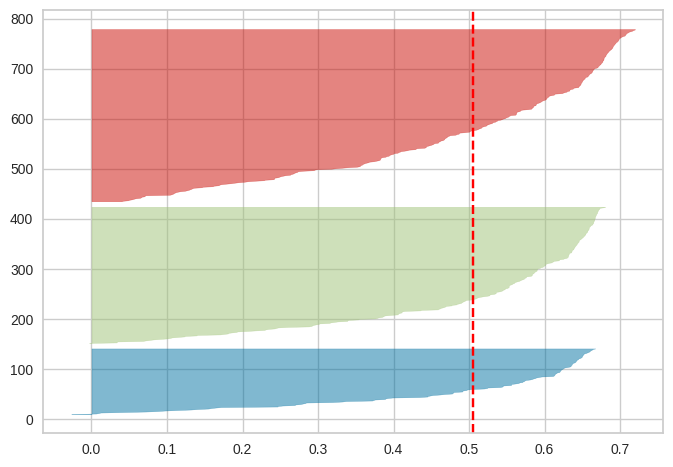

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df)
plt.show()

In [ ]:
df['cluster'] = clusters
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

         acousticness  danceability    energy  instrumentalness       key  \
cluster                                                                     
0            0.225927      0.677465  0.678141          0.066201  1.422535   
1            0.818696      0.421435  0.213470          0.256719  4.695652   
2            0.370583      0.520806  0.551032          0.090072  5.129032   
3            0.293341      0.632714  0.651714          0.045878  5.523810   
4            0.339703      0.554667  0.636622          0.051706  4.055556   
5            0.332792      0.630395  0.631779          0.051033  5.093023   
6            0.383252      0.621153  0.565298          0.076633  3.494118   
7            0.213679      0.650813  0.684173          0.046894  5.586667   
8            0.261546      0.683072  0.707108          0.102626  7.783133   
9            0.969938      0.392500  0.090122          0.738125  5.062500   
10           0.357513      0.526471  0.597608          0.024679  5.254902   

##d. Realizar un análisis de cada grupo k=3

In [ ]:
from sklearn.cluster import KMeans

#KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(spotify)

# Añadir la columna 'cluster' al DataFrame
spotify['cluster'] = kmeans.labels_


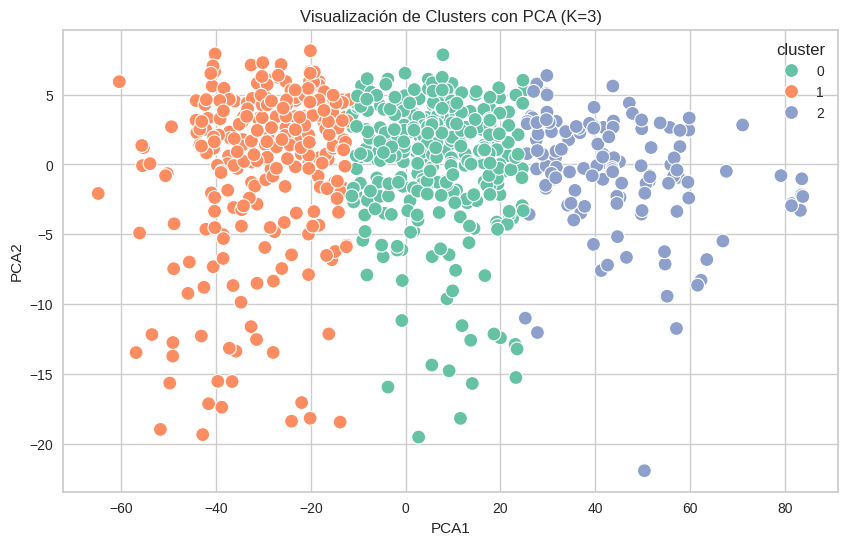

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#aplicr PCA para reducir las dimensiones a 2 componentes
pca = PCA(n_components=2)
pca_data = pca.fit_transform(spotify.drop('cluster', axis=1))  # Excluir la columna 'cluster'

# Crear un DataFrame con las 2 componentes y los clusters
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = spotify['cluster']

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='Set2', s=100)
plt.title('Visualización de Clusters con PCA (K=3)')
plt.show()


In [ ]:
# Agrupar por clusters y calcular la media de cada característica
cluster_summary = spotify.groupby('cluster').mean()
print(cluster_summary)


         acousticness  danceability    energy  instrumentalness       key  \
cluster                                                                     
0            0.334748      0.641406  0.625737          0.099372  4.565217   
1            0.408939      0.563685  0.527741          0.113680  5.355311   
2            0.309979      0.546652  0.649155          0.074740  4.431818   

         liveness  loudness      mode  speechiness       tempo  \
cluster                                                          
0        0.202109 -7.973203  0.750725     0.088650  126.838397   
1        0.203737 -9.688619  0.728938     0.092058   90.916681   
2        0.205942 -7.471636  0.742424     0.140218  164.581970   

         time_signature   valence  duration_min  
cluster                                          
0              3.933333  0.514079      3.629882  
1              3.879121  0.471101      3.746453  
2              3.871212  0.507750      3.608471  


<ipython-input-42-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-42-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-42-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-42-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning

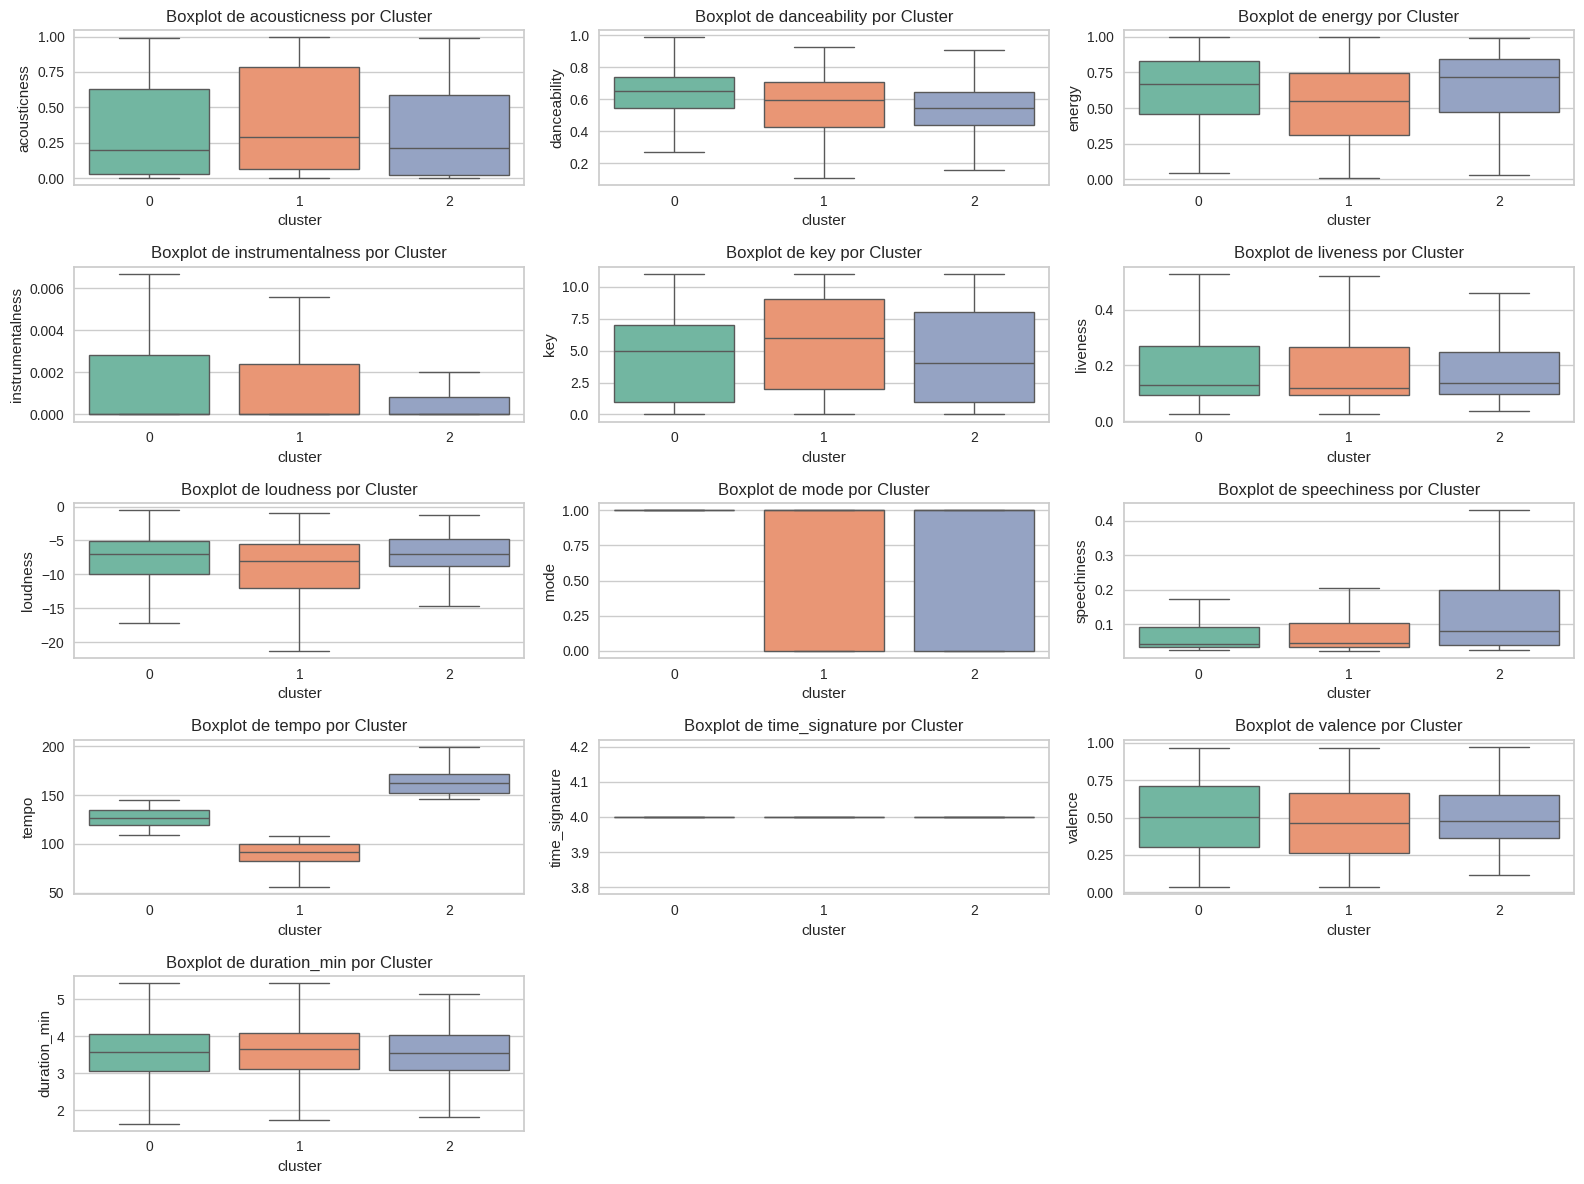

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas para graficar
columns_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                   'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
                   'time_signature', 'valence', 'duration_min']

#columnas en el DataFrame spotify
for column in columns_to_plot:
    if column not in spotify.columns:
        print(f"Warning: La columna '{column}' no está en el DataFrame spotify.")

#crear un grafico boxplot para cada columna, comparando los 3 clusters y sin outliers
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_plot, 1):
    if column in spotify.columns:
        plt.subplot(5, 3, i)
        sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
        plt.title(f'Boxplot de {column} por Cluster')
        plt.tight_layout()

plt.show()


####Conclusión
Vemos las medias de cada columan para poder ver cómo está agrupando. Y de tener que dar un género musical lo haría así:    
1. Pop: muy energetico,ruidoso, sin palabras,alegre
2. Sinfónica: sin palabras,menos rápidas (tempo),triste
3. Rock:  Menos bailable, mas energético, ruidoso, muchas palabras. mas rapidas,medio triste

#Estudio con k=4

In [ ]:
spotify=spotify_copy.copy()

In [ ]:
from sklearn.cluster import KMeans

#KMeans con k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(spotify)

# Añadir la columna 'cluster' al DataFrame
spotify['cluster'] = kmeans.labels_


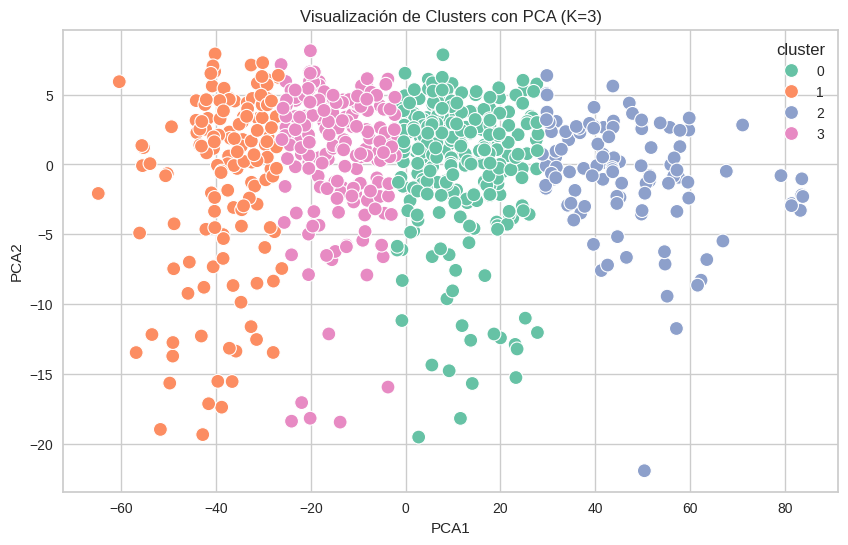

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#aplicr PCA para reducir las dimensiones a 2 componentes
pca = PCA(n_components=2)
pca_data = pca.fit_transform(spotify.drop('cluster', axis=1))  # Excluir la columna 'cluster'

# Crear un DataFrame con las 2 componentes y los clusters
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = spotify['cluster']

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='Set2', s=100)
plt.title('Visualización de Clusters con PCA (K=3)')
plt.show()


In [ ]:
# Agrupar por clusters y calcular la media de cada característica
cluster_summary = spotify.groupby('cluster').mean()
print(cluster_summary)


         acousticness  danceability    energy  instrumentalness       key  \
cluster                                                                     
0            0.322454      0.635583  0.635984          0.109060  4.731449   
1            0.512961      0.511296  0.462043          0.152338  5.289474   
2            0.310670      0.555145  0.638048          0.070586  4.247863   
3            0.315519      0.630253  0.609976          0.065180  4.959596   

         liveness   loudness      mode  speechiness       tempo  \
cluster                                                           
0        0.202384  -7.946498  0.738516     0.087695  131.524746   
1        0.189398 -10.875888  0.756579     0.095361   82.688579   
2        0.196680  -7.496504  0.743590     0.146432  166.807359   
3        0.219481  -8.095551  0.732323     0.089796  106.048955   

         time_signature   valence  duration_min  
cluster                                          
0              3.939929  0.510604 

<ipython-input-56-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-56-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-56-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-56-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning

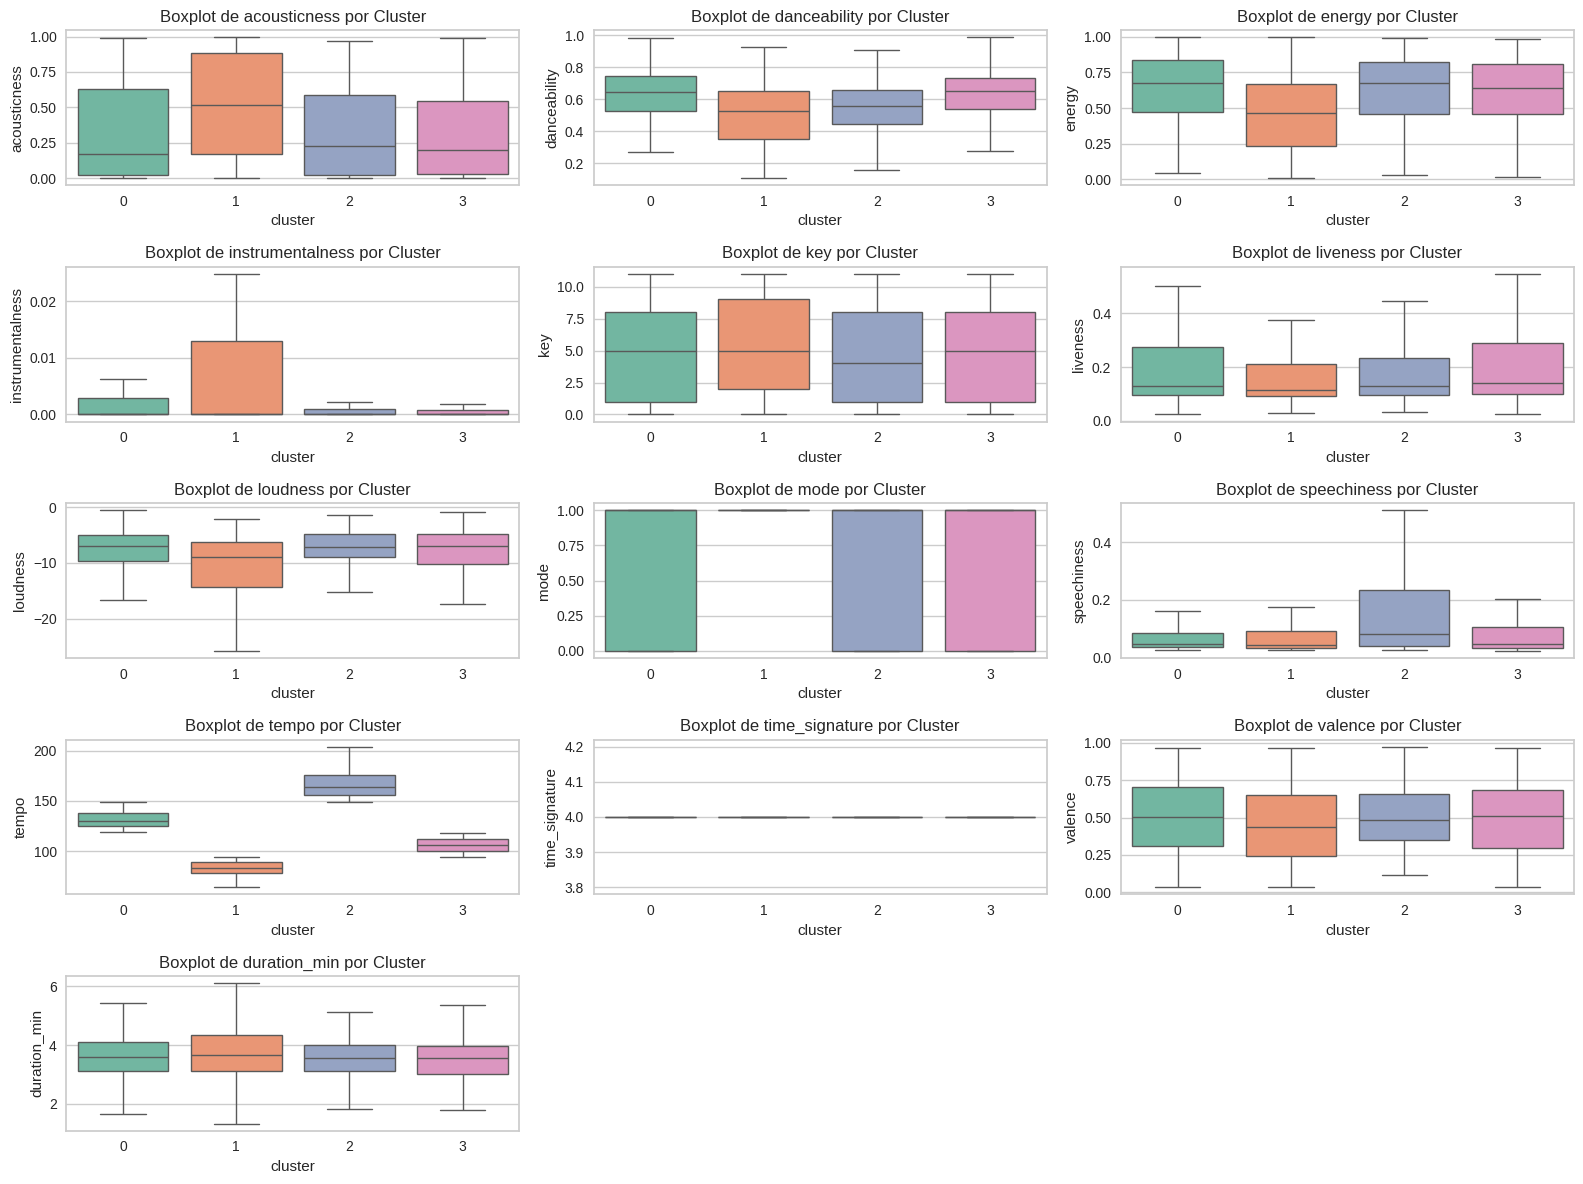

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas para graficar
columns_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                   'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
                   'time_signature', 'valence', 'duration_min']

#columnas en el DataFrame spotify
for column in columns_to_plot:
    if column not in spotify.columns:
        print(f"Warning: La columna '{column}' no está en el DataFrame spotify.")

#crear un grafico boxplot para cada columna, comparando los 3 clusters y sin outliers
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_plot, 1):
    if column in spotify.columns:
        plt.subplot(5, 3, i)
        sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
        plt.title(f'Boxplot de {column} por Cluster')
        plt.tight_layout()

plt.show()


###Conclusión
Con k=4 se siguen fromando grupos bien marcados.  
Podría agruparse en los siguientes géneros:
1. Pop electrónico: La que es más para bailar,energética, ruidosa
2. Country o rock suave: muy acústicas, no para bailar, menos energética, muy instrumental
3. Metal: energetica, con más palabras, tempo más rápido
4. Funk: muy bailable, energética, no acustica ni instrumental.


#Estudio con k=5

In [ ]:
spotify=spotify_copy.copy()

In [ ]:
from sklearn.cluster import KMeans

#KMeans con k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(spotify)

# Añadir la columna 'cluster' al DataFrame
spotify['cluster'] = kmeans.labels_


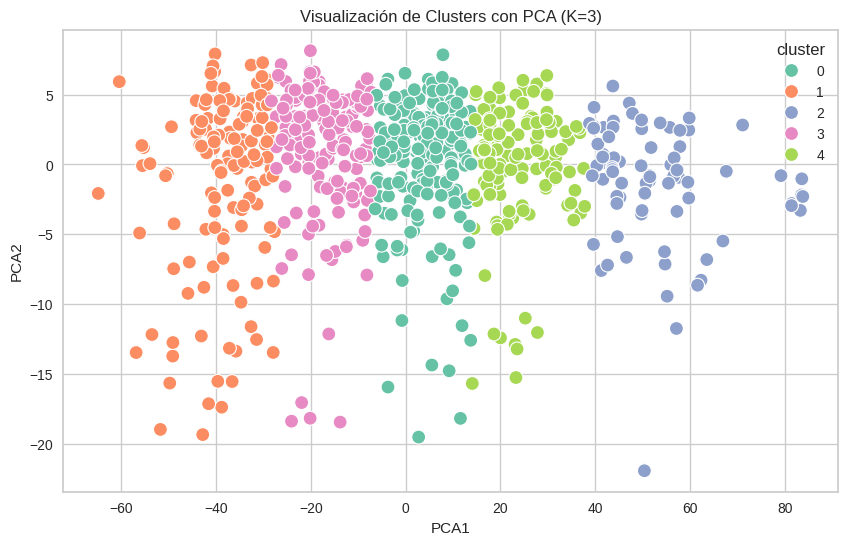

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#aplicr PCA para reducir las dimensiones a 2 componentes
pca = PCA(n_components=2)
pca_data = pca.fit_transform(spotify.drop('cluster', axis=1))  # Excluir la columna 'cluster'

# Crear un DataFrame con las 2 componentes y los clusters
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = spotify['cluster']

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='Set2', s=100)
plt.title('Visualización de Clusters con PCA (K=3)')
plt.show()


In [ ]:
# Agrupar por clusters y calcular la media de cada característica
cluster_summary = spotify.groupby('cluster').mean()
print(cluster_summary)


         acousticness  danceability    energy  instrumentalness       key  \
cluster                                                                     
0            0.315256      0.665360  0.634836          0.104851  4.689189   
1            0.518602      0.498035  0.455023          0.160716  5.076389   
2            0.339804      0.546329  0.613641          0.070339  4.493671   
3            0.301481      0.627341  0.612036          0.064530  5.257485   
4            0.334699      0.579536  0.641278          0.090073  4.471014   

         liveness   loudness      mode  speechiness       tempo  \
cluster                                                           
0        0.191378  -7.938455  0.743243     0.087790  124.600581   
1        0.194175 -11.052931  0.750000     0.093661   82.097750   
2        0.175501  -7.933342  0.721519     0.149597  173.227025   
3        0.223608  -8.057940  0.724551     0.088850  103.082228   
4        0.223752  -7.649529  0.760870     0.105739  144.3

<ipython-input-63-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-63-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-63-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
<ipython-input-63-40f585495140>:19: FutureWarning: 

Passing `palette` without assigning

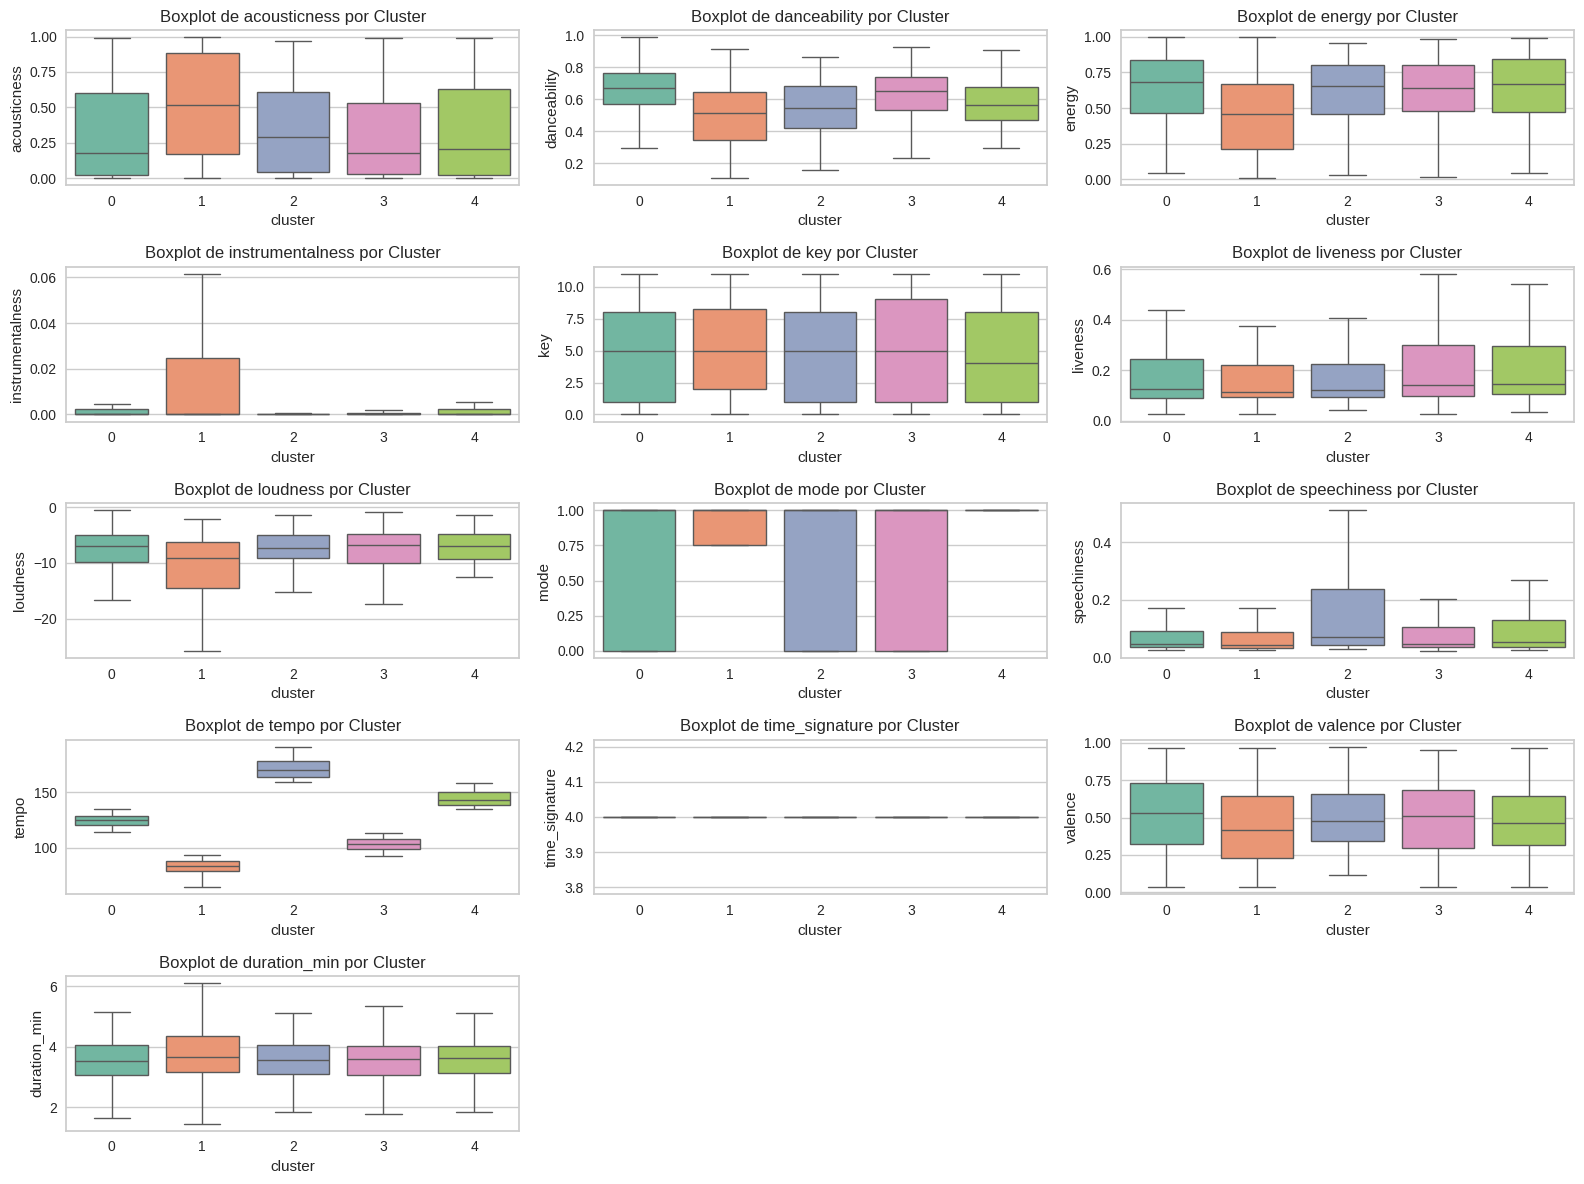

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas para graficar
columns_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                   'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
                   'time_signature', 'valence', 'duration_min']

#columnas en el DataFrame spotify
for column in columns_to_plot:
    if column not in spotify.columns:
        print(f"Warning: La columna '{column}' no está en el DataFrame spotify.")

#crear un grafico boxplot para cada columna, comparando los 3 clusters y sin outliers
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_plot, 1):
    if column in spotify.columns:
        plt.subplot(5, 3, i)
        sns.boxplot(x='cluster', y=column, data=spotify, palette='Set2', showfliers=False)
        plt.title(f'Boxplot de {column} por Cluster')
        plt.tight_layout()

plt.show()


###Conclusión
Con k=4 se siguen fromando grupos bien marcados.  
Podría agruparse en los siguientes géneros:
1. Pop: energía normal, bailable normal, poca acústica.
2. Indie acústico: acústico, tempo lento, no bailable, energpia baja, muy instrumental
3. Metal: alto tempo y energía, bajo instrumental, muchas palabras
4. Funk: muy bailable, energética, no acustica ni instrumental.
5. Rock: alta energía, tempo normal, acústica normal, alta energia, mas live.

#Conclusión
En comparación de los ejercicios 1,2,3, éste dataframe estaba totalmente limpio, creamos solamente la  nueva variable de minutos basandonos en la de milisegundos.  
Se hizo el estudio con agrupaciones de 3,4 y 5. Éstas agrupaciones nos pueden dar una idea para poder calificar las canciones en distintos géneros, entre más agrupaciones hacemos más específico el género y menos se van diferenciando los distitntos grupos.